In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('Downloads\crime_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

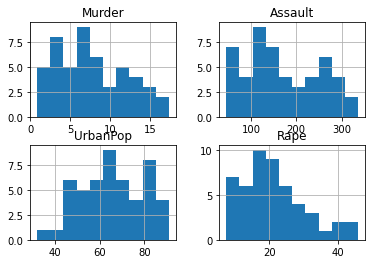

In [5]:
df.hist()

In [6]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

In [7]:
df_norm=norm_func(df.iloc[:,1:])

In [8]:
z=linkage(df_norm,method="complete", metric="euclidean")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

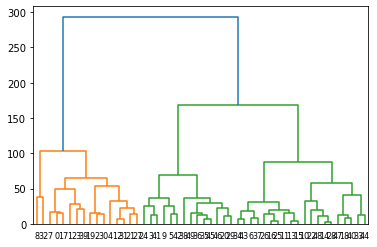

In [9]:
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.,)

In [10]:
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete").fit(df_norm)

In [11]:
clusters_labels=pd.Series(model.labels_)

In [12]:
df["Clusters"]=clusters_labels
df=df.iloc[:,[5,0,1,2,3,4]]
df.iloc[:,2:].groupby(df.Clusters).median()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,3.55,94.0,59.5,14.55
1,11.35,257.0,71.0,26.95
2,7.65,167.5,69.0,23.10
3,14.20,336.0,62.5,24.00


In [13]:
df.to_csv("crime_H.csv",encoding="utf-8")

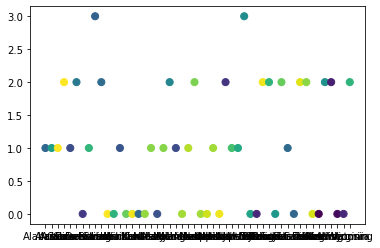

In [17]:
N=50
colors = np.random.rand(N)
plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c=colors, s=50, cmap='viridis');